# Quake

By Cascade Tuholske, June 2020

Notebook finds zonal stats of populations for 2015 Nepal earthquakes by raster. <br><br>
**NOTE** CRS should be epsg:4326 for everything!

In [1]:
#### Dependencies
import numpy as np
import pandas as pd
import rasterio
import geopandas as gpd
from rasterstats import zonal_stats, gen_zonal_stats
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
Patch = patches.Patch

In [2]:
#### Functions
def zone_loop(polys_in, rst_list, stats_type, col, split):
    """ Function loops through rasters, calcs zonal_stats and returns stats as a data frame.
    Args:
        polys_in = polygons
        rst_list = list of paths & fns of rasters
        stats_type = stats type for each poly gone (see zonal stats)
        col = column to merge it all
        split = where to split the file name string (e.g. _matched.tif)
    """
    
    # copy polys to write out
    polys_out = polys_in.copy()
    
    for rst in rst_list:
        
        # Get data name
        data = rst.split(DATA_PATH+'interim/')[1].split(split)[0]
        print('Started', data)
        
        # Run zonal stats
        zs_feats = zonal_stats(polys_in, rst, stats=stats_type, geojson_out=True)
        zgdf = gpd.GeoDataFrame.from_features(zs_feats, crs=polys_in.crs)
        
        # Rename columns and merge
        zgdf = zgdf.rename(columns={stats_type: data+'_'+stats_type})
        
        polys_out = polys_out.merge(zgdf[[col, data+'_'+stats_type]], on = col, how = 'inner')
    
    return polys_out

In [3]:
def poly_prep(polys_fn, col):
    "function opens earth quake polygons for zonal loop"
    
    # open
    polys = gpd.read_file(polys_fn)
    
    # subset, be sure to check the admin level
    polys = polys[['geometry', col]]
    
    return polys

## Run on Shakemap Intensity Contours (MI) from USGS for Nepal 2015



#### All

In [4]:
# Git tif files
rst_fns = sorted(glob('/Users/cascade/Github/PopGridCompare/data/interim/*all_NPL.tif'))
rst_fns

['/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_all_NPL.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GHS15_all_NPL.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GPWv4_all_NPL.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/LS15_all_NPL.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/WP16_all_NPL.tif']

In [5]:
# open polys
DATA_PATH = '/Users/cascade/Github/PopGridCompare/data/'
nepal_polys_fn = DATA_PATH+'raw/USGS_Data/Nepal/shape/mi.shp'

col = 'PARAMVALUE'
nepal_polys = poly_prep(nepal_polys_fn, col)

In [6]:
# Run zonal stats loop
nepal_polys_sum = zone_loop(nepal_polys, rst_fns, 'sum', col, '_all_NPL.tif')

Started ESRI16
Started GHS15
Started GPWv4
Started LS15
Started WP16


In [7]:
# Save the poly sums
nepal_polys_sum.to_file(DATA_PATH+'/processed/nepal_quake_pop.shp')

#### Urban

In [8]:
# Git tif files
rst_fns = sorted(glob('/Users/cascade/Github/PopGridCompare/data/interim/*_urban_NPL.tif'))
rst_fns

['/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_urban_NPL.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GHS15_urban_NPL.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GPWv4_urban_NPL.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/LS15_urban_NPL.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/WP16_urban_NPL.tif']

In [9]:
# open polys
DATA_PATH = '/Users/cascade/Github/PopGridCompare/data/'
nepal_polys_fn = DATA_PATH+'raw/USGS_Data/Nepal/shape/mi.shp'

col = 'PARAMVALUE'
nepal_polys = poly_prep(nepal_polys_fn, col)


In [10]:
# Run zonal stats loop
nepal_polys_sum = zone_loop(nepal_polys, rst_fns, 'sum', col, '_urban_NPL.tif')


Started ESRI16
Started GHS15
Started GPWv4
Started LS15
Started WP16


In [11]:
#### Save the poly sums
nepal_polys_sum.to_file(DATA_PATH+'/processed/nepal_urban_quake_pop.shp')

#### Rural

In [12]:
# Git tif files
rst_fns = glob('/Users/cascade/Github/PopGridCompare/data/interim/*_rural_NPL.tif')
rst_fns

['/Users/cascade/Github/PopGridCompare/data/interim/WP16_rural_NPL.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_rural_NPL.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GHS15_rural_NPL.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/LS15_rural_NPL.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GPWv4_rural_NPL.tif']

In [13]:
# open polys
DATA_PATH = '/Users/cascade/Github/PopGridCompare/data/'
nepal_polys_fn = DATA_PATH+'raw/USGS_Data/Nepal/shape/mi.shp'

col = 'PARAMVALUE'
nepal_polys = poly_prep(nepal_polys_fn, col)


In [14]:
# Run zonal stats loop
nepal_polys_sum = zone_loop(nepal_polys, rst_fns, 'sum', col, '_rural_NPL.tif')


Started WP16
Started ESRI16
Started GHS15
Started LS15
Started GPWv4


In [15]:
#### Save the poly sums
nepal_polys_sum.to_file(DATA_PATH+'/processed/nepal_rural_quake_pop.shp')

# Check data

In [16]:
# All
fn_in = DATA_PATH+'/processed/nepal_quake_pop.shp'
all_pop = gpd.read_file(fn_in)
all_pop

,PARAMVALUE,ESRI16_sum,GHS15_sum,GPWv4_sum,LS15_sum,WP16_sum,geometry
0,2.8,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((90.08423 31.91667, 90.08387 31..."
1,3.0,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((81.46715 31.90000, 81.46696 31..."
2,3.2,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((81.97315 31.91667, 81.97108 31..."
3,3.4,28778.0,2.417036e+04,2.619679e+04,29991.0,2.571591e+04,"MULTIPOLYGON (((82.98663 31.91667, 82.98523 31..."
4,3.6,440133.0,3.270798e+05,3.665828e+05,398353.0,3.581681e+05,"MULTIPOLYGON (((84.81601 31.93333, 84.80491 31..."
5,3.8,690782.0,5.466771e+05,5.978650e+05,638862.0,5.705852e+05,"MULTIPOLYGON (((85.14253 31.75000, 85.14092 31..."
6,4.0,1447496.0,1.203884e+06,1.337989e+06,1278918.0,1.370039e+06,"MULTIPOLYGON (((84.66259 31.40000, 84.65680 31..."
7,4.2,1691728.0,1.255085e+06,1.371940e+06,1655900.0,1.396989e+06,"MULTIPOLYGON (((85.13591 31.01667, 85.13522 31..."
8,4.4,1650961.0,1.347470e+06,1.451328e+06,1486528.0,1.426692e+06,"MULTIPOLYGON (((84.80292 30.56667, 84.80248 30..."
9,4.6,1457114.0,1.113182e+06,1.189069e+06,1396544.0,1.245456e+06,"MULTIPOLYGON (((84.68411 30.28333, 84.68384 30..."


In [17]:
# Urban
fn_in = DATA_PATH+'/processed/nepal_urban_quake_pop.shp'
urban_pop = gpd.read_file(fn_in)
urban_pop

,PARAMVALUE,ESRI16_sum,GHS15_sum,GPWv4_sum,LS15_sum,WP16_sum,geometry
0,2.8,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((90.08423 31.91667, 90.08387 31..."
1,3.0,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((81.46715 31.90000, 81.46696 31..."
2,3.2,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((81.97315 31.91667, 81.97108 31..."
3,3.4,0.0,0.000000e+00,0.000000,0.0,0.000000e+00,"MULTIPOLYGON (((82.98663 31.91667, 82.98523 31..."
4,3.6,0.0,0.000000e+00,0.000000,0.0,0.000000e+00,"MULTIPOLYGON (((84.81601 31.93333, 84.80491 31..."
5,3.8,0.0,0.000000e+00,0.000000,0.0,0.000000e+00,"MULTIPOLYGON (((85.14253 31.75000, 85.14092 31..."
6,4.0,0.0,0.000000e+00,0.000000,0.0,0.000000e+00,"MULTIPOLYGON (((84.66259 31.40000, 84.65680 31..."
7,4.2,38314.0,5.509021e+04,22884.103516,41879.0,3.542495e+04,"MULTIPOLYGON (((85.13591 31.01667, 85.13522 31..."
8,4.4,0.0,0.000000e+00,0.000000,0.0,0.000000e+00,"MULTIPOLYGON (((84.80292 30.56667, 84.80248 30..."
9,4.6,0.0,0.000000e+00,0.000000,0.0,0.000000e+00,"MULTIPOLYGON (((84.68411 30.28333, 84.68384 30..."


In [18]:
# Urban
fn_in = DATA_PATH+'/processed/nepal_rural_quake_pop.shp'
rural_pop = gpd.read_file(fn_in)
rural_pop

,PARAMVALUE,WP16_sum,ESRI16_sum,GHS15_sum,LS15_sum,GPWv4_sum,geometry
0,2.8,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((90.08423 31.91667, 90.08387 31..."
1,3.0,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((81.46715 31.90000, 81.46696 31..."
2,3.2,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((81.97315 31.91667, 81.97108 31..."
3,3.4,2.571591e+04,28778.0,2.417036e+04,29991.0,2.619679e+04,"MULTIPOLYGON (((82.98663 31.91667, 82.98523 31..."
4,3.6,3.581681e+05,440133.0,3.270798e+05,398353.0,3.665828e+05,"MULTIPOLYGON (((84.81601 31.93333, 84.80491 31..."
5,3.8,5.705852e+05,690782.0,5.466771e+05,638862.0,5.978650e+05,"MULTIPOLYGON (((85.14253 31.75000, 85.14092 31..."
6,4.0,1.370039e+06,1447496.0,1.203884e+06,1278918.0,1.337989e+06,"MULTIPOLYGON (((84.66259 31.40000, 84.65680 31..."
7,4.2,1.361564e+06,1653414.0,1.199995e+06,1614021.0,1.349056e+06,"MULTIPOLYGON (((85.13591 31.01667, 85.13522 31..."
8,4.4,1.426692e+06,1650961.0,1.347470e+06,1486528.0,1.451328e+06,"MULTIPOLYGON (((84.80292 30.56667, 84.80248 30..."
9,4.6,1.245456e+06,1457114.0,1.113182e+06,1396544.0,1.189069e+06,"MULTIPOLYGON (((84.68411 30.28333, 84.68384 30..."


In [ ]:
# Check that rural + urban = total

In [27]:
# Check the data 
(rural_pop.iloc[:,1:6] + urban_pop.iloc[:,1:6]) / all_pop.iloc[:,1:6]

,ESRI16_sum,GHS15_sum,GPWv4_sum,LS15_sum,WP16_sum
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0


# Plots

In [28]:
#### set colors
ESRI16_c = 'blue'
GHS15_c = 'indigo'
GPWv4_c = 'deeppink'
LS15_c = 'deepskyblue'
WP16_c = 'forestgreen'

In [147]:
npl_all_fn = DATA_PATH+'processed/nepal_quake_pop.shp'
npl_all = gpd.read_file(npl_all_fn)

In [148]:
npl_rural_fn = DATA_PATH+'processed/nepal_rural_quake_pop.shp'
npl_rural = gpd.read_file(npl_rural_fn)

In [149]:
npl_urban_fn = DATA_PATH+'processed/nepal_urban_quake_pop.shp'
npl_urban = gpd.read_file(npl_urban_fn)

In [172]:
test_a = npl_all[(npl_all['PARAMVALUE'] >= 4) & (npl_all['PARAMVALUE'] < 5)].iloc[:,1:6].sum(axis = 0)

In [174]:
test_b = npl_rural[(npl_rural['PARAMVALUE'] >= 4) & (npl_rural['PARAMVALUE'] < 5)].iloc[:,1:6].sum(axis = 0)

In [175]:
test_c = npl_urban[(npl_urban['PARAMVALUE'] >= 4) & (npl_urban['PARAMVALUE'] < 5)].iloc[:,1:6].sum(axis = 0)

In [176]:
(test_b + test_c) / test_a

ESRI16_sum    1.0
GHS15_sum     1.0
GPWv4_sum     1.0
LS15_sum      1.0
WP16_sum      1.0
dtype: float64

In [221]:
# Make data
def group(df):
    
    " Group and sum population by MI ranges, args is df quake pop"
    
    iv = df[(df['PARAMVALUE'] >= 4) & (df['PARAMVALUE'] < 5)].iloc[:,1:6].sum(axis = 0)
    v = df[(df['PARAMVALUE'] >= 5) & (df['PARAMVALUE'] < 6)].iloc[:,1:6].sum(axis = 0)
    vi = df[(df['PARAMVALUE'] >= 6) & (df['PARAMVALUE'] < 7)].iloc[:,1:6].sum(axis = 0)
    vii = df[df['PARAMVALUE'] >= 7].iloc[:,1:6].sum(axis = 0)
    
    out = pd.DataFrame()
    out['iv'] = iv
    out['v'] = v
    out['vi'] = vi
    out['vii'] = vii
    
    out = out.transpose()
    return out

In [228]:
# Double check urban + rural / total = 100
all_g = group(npl_all)
rural_g = group(npl_rural)
urban_g = group(npl_urban)
(rural_g+urban_g) / all_g

,ESRI16_sum,GHS15_sum,GPWv4_sum,LS15_sum,WP16_sum
iv,1.0,1.0,1.0,1.0,1.0
v,1.0,1.0,1.0,1.0,1.0
vi,1.0,1.0,1.0,1.0,1.0
vii,1.0,1.0,1.0,1.0,1.0


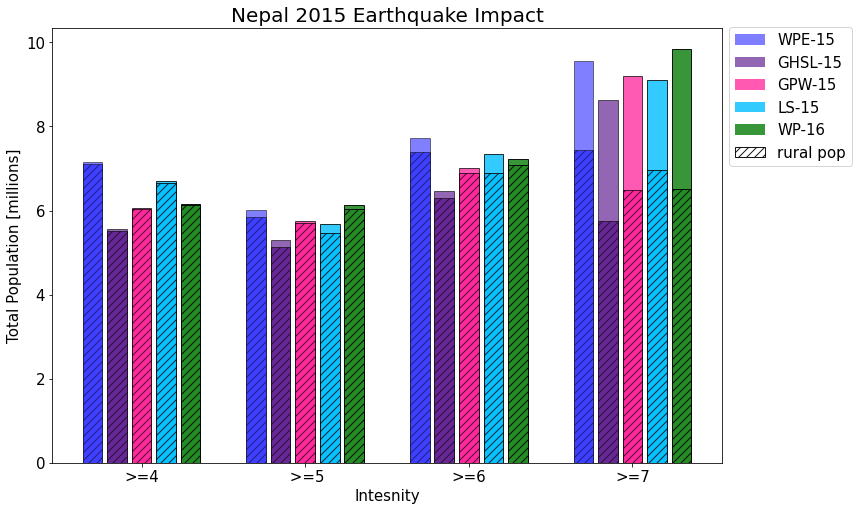

In [227]:
# Make bar plot 
fig, axs = plt.subplots(1, 1, figsize = (12, 8), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)
scale = 10**6

# All Quake
data = group(npl_all)

# Bar locations
a = [1-.3,2-.3,3-.3, 4-.3]
b = [1-.15,2-.15,3-.15,4-.15]
c = [1,2,3,4]
d = [1+.15,2+.15,3+.15,4+.15]
e = [1+.3,2+.3,3+.3,4+.3]

# plots
plt.bar(a, data.ESRI16_sum / scale, width=0.12, align='center', alpha  = 0.5, color = ESRI16_c, ec = 'black')
plt.bar(b, data.GHS15_sum / scale, width=0.12, align='center', alpha  = 0.6, color = GHS15_c, ec = 'black')
plt.bar(c, data.GPWv4_sum / scale, width=0.12, align='center', alpha  = 0.7, color = GPWv4_c, ec = 'black')
plt.bar(d, data.LS15_sum / scale, width=0.12, align='center', alpha  = 0.8, color = LS15_c, ec = 'black')
plt.bar(e, data.WP16_sum / scale, width=0.12, align='center', alpha  = 0.9, color = WP16_c, ec = 'black')

# Fake plot for rural hatch legend 
plt.bar(e, data.WP16_sum / scale, width=0.12, align='center', alpha  = 0, color = 'white', ec = 'black',hatch = "///")

# rural floods
data = group(npl_rural)
plt.bar(a, data.ESRI16_sum / scale, width=0.12, align='center', alpha  = 0.5, color = ESRI16_c, ec = 'black', hatch = "///")
plt.bar(b, data.GHS15_sum / scale, width=0.12, align='center', alpha  = 0.6, color = GHS15_c, ec = 'black', hatch = "///")
plt.bar(c, data.GPWv4_sum / scale, width=0.12, align='center', alpha  = 0.7, color = GPWv4_c, ec = 'black', hatch = "///")
plt.bar(d, data.LS15_sum / scale, width=0.12, align='center', alpha  = 0.8, color = LS15_c, ec = 'black', hatch = "///")
plt.bar(e, data.WP16_sum / scale, width=0.12, align='center', alpha  = 0.9, color = WP16_c, ec = 'black', hatch = "///")

# legend
legend_elements = [Patch(facecolor=ESRI16_c, alpha = 0.5, edgecolor=None, label='WPE-15'),
                  Patch(facecolor=GHS15_c, alpha = 0.6, edgecolor=None, label='GHSL-15'),
                  Patch(facecolor=GPWv4_c, alpha = 0.7, edgecolor=None, label='GPW-15'),
                  Patch(facecolor=LS15_c, alpha = 0.8, edgecolor=None, label='LS-15'),
                  Patch(facecolor= WP16_c, alpha = 0.9, edgecolor=None, label='WP-16'),
                  Patch(facecolor= 'white', alpha = 0.9,  hatch = '///', edgecolor='black', label='rural pop')]
plt.legend(handles = legend_elements, bbox_to_anchor=(1, 1.02), loc='upper left', ncol=1, fontsize = 15);

# Labels / Titles
axs.set_title('Nepal 2015 Earthquake Impact', size = 20)
axs.set_xlabel('Intesnity', fontsize = 15)
axs.set_ylabel('Total Population [millions]', fontsize = 15)

# Ticks
ticks_bar = ['>=4', ' >=5', '>=6', '>=7'];
plt.xticks([1,2,3,4], ticks_bar, fontsize = 15);
plt.yticks(fontsize = 15);

# save it out
fig_out = '/Users/cascade/Github/PopGridCompare/data/FIGS/MS/Finalv1/Fig4.png'
plt.savefig(fig_out, dpi = 300, facecolor = 'white', bbox_inches='tight')

# Analysis

In [229]:
# Double check urban + rural / total = 100
all_g = group(npl_all)
rural_g = group(npl_rural)
urban_g = group(npl_urban)
(rural_g+urban_g) / all_g

,ESRI16_sum,GHS15_sum,GPWv4_sum,LS15_sum,WP16_sum
iv,1.0,1.0,1.0,1.0,1.0
v,1.0,1.0,1.0,1.0,1.0
vi,1.0,1.0,1.0,1.0,1.0
vii,1.0,1.0,1.0,1.0,1.0


In [231]:
all_g

,ESRI16_sum,GHS15_sum,GPWv4_sum,LS15_sum,WP16_sum
iv,7146571.0,5.560598e+06,6.056323e+06,6701395.0,6.166267e+06
v,6012939.0,5.308586e+06,5.746981e+06,5681175.0,6.142326e+06
vi,7734957.0,6.456341e+06,7.000053e+06,7333782.0,7.225941e+06
vii,9555085.0,8.637799e+06,9.198085e+06,9099197.0,9.849631e+06


In [241]:
# Check Min & Max All
print('Max 7 \n', all_g.max(axis = 1))
print('Min 7 \n', all_g.min(axis = 1))



Max 7 
 iv     7.146571e+06
v      6.142326e+06
vi     7.734957e+06
vii    9.849631e+06
dtype: float64
Min 7 
 iv     5.560598e+06
v      5.308586e+06
vi     6.456341e+06
vii    8.637799e+06
dtype: float64


In [234]:
# pct urban
urban_g / all_g * 100

,ESRI16_sum,GHS15_sum,GPWv4_sum,LS15_sum,WP16_sum
iv,0.536117,0.990725,0.377855,0.624930,0.574496
v,2.665020,3.528205,0.749096,3.812257,1.914384
vi,4.583749,2.539725,1.576319,6.083369,2.152983
vii,22.059636,33.475744,29.385040,23.562519,33.809371


In [239]:
urban_g

,ESRI16_sum,GHS15_sum,GPWv4_sum,LS15_sum,WP16_sum
iv,38314.0,5.509021e+04,2.288410e+04,41879.0,3.542495e+04
v,160246.0,1.872978e+05,4.305042e+04,216581.0,1.175877e+05
vi,354551.0,1.639733e+05,1.103432e+05,446141.0,1.555733e+05
vii,2107817.0,2.891568e+06,2.702861e+06,2144000.0,3.330098e+06


In [243]:
all_g

,ESRI16_sum,GHS15_sum,GPWv4_sum,LS15_sum,WP16_sum
iv,7146571.0,5.560598e+06,6.056323e+06,6701395.0,6.166267e+06
v,6012939.0,5.308586e+06,5.746981e+06,5681175.0,6.142326e+06
vi,7734957.0,6.456341e+06,7.000053e+06,7333782.0,7.225941e+06
vii,9555085.0,8.637799e+06,9.198085e+06,9099197.0,9.849631e+06


In [242]:
# Check Min & Max Urban
print('Max 7 \n', urban_g.max(axis = 1))
print('Min 7 \n', urban_g.min(axis = 1))

Max 7 
 iv     5.509021e+04
v      2.165810e+05
vi     4.461410e+05
vii    3.330098e+06
dtype: float64
Min 7 
 iv     2.288410e+04
v      4.305042e+04
vi     1.103432e+05
vii    2.107817e+06
dtype: float64


# Old CODE BELOW

## Analysis

In [ ]:
# All
fn_in = DATA_PATH+'/processed/nepal_quake_pop.shp'
all_pop = gpd.read_file(fn_in)
df_all.head(1)

In [ ]:
all_pop [all_pop ['PARAMVALUE'] == 7.4].iloc[:,1:-1] / 10**6

In [ ]:
print('dif between max and min all nepal', 2.82526 - 2.33003)

In [ ]:
all_pop [all_pop ['PARAMVALUE'] > 6.8].iloc[:,1:-1]

In [ ]:
# All
all_pop = gpd.read_file(DATA_PATH+'/processed/nepal_quake_pop.shp')
all_pop['max'] = all_pop.iloc[:,1:5].values.max(1)
all_pop['min'] = all_pop.iloc[:,1:5].values.min(1)
all_pop['dif'] = all_pop['max'] - all_pop['min']

In [ ]:
# Urban 
urban_pop = gpd.read_file(DATA_PATH+'/processed/nepal_urban_quake_pop.shp')
urban_pop['max'] = urban_pop.iloc[:,1:5].values.max(1)
urban_pop['min'] = urban_pop.iloc[:,1:5].values.min(1)
urban_pop['dif'] = urban_pop['max'] - urban_pop['min']

In [ ]:
urban_pop[urban_pop['PARAMVALUE'] >= 7.2].iloc[:,:6] 

In [ ]:
# rural 
rural_pop = gpd.read_file(DATA_PATH+'/processed/nepal_rural_quake_pop.shp')
rural_pop['max'] = rural_pop.iloc[:,1:5].values.max(1)
rural_pop['min'] = rural_pop.iloc[:,1:5].values.min(1)
rural_pop['dif'] = rural_pop['max'] - rural_pop['min']

In [ ]:
rural_pop[rural_pop['PARAMVALUE'] == 7]

In [ ]:
#### plot it Nepal
data = nepal_polys_sum[nepal_polys_sum['PARAMVALUE'] > 6]
title = '2015 Nepal Earth Quake > 6 Intensity'
scale = 10**6

fig, axs = plt.subplots(1, 1, figsize = (8, 8), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

axs.scatter(data['PARAMVALUE'], data['ESRI16_sum'] / scale, color = ESRI16_c, alpha = 0.5, s = 70)
axs.scatter(data['PARAMVALUE'], data['GHS15_sum'] / scale, color = GHS15_c, alpha = 0.5, s = 70)
axs.scatter(data['PARAMVALUE'], data['GPWv4_sum'] / scale, color = GWPv4_c,  alpha = 0.5, s = 70)
axs.scatter(data['PARAMVALUE'], data['LS15_sum'] / scale, color = LS15_c, alpha = 0.5, s = 70)
axs.scatter(data['PARAMVALUE'], data['WP16_sum'] / scale, color = WP16_c, alpha = 0.5, s = 70)

axs.set_title(title, size = 20 )
axs.set_xlabel('Quake Intensity', fontsize = 20)
axs.set_ylabel('Population [millions]', fontsize = 20)
#plt.ylim([100,10000000])

plt.yscale('linear')
axs.ticklabel_format(useOffset=False, style = 'plain')

labels = ['WPE-16', 'GHSL-15', 'GPWv4-15', 'LS-15', 'WP-16']
plt.legend(labels)

# save it out
fig_out = '/Users/cascade/Github/PopGridCompare/data/FIGS/MS/Finalv1/Nepal2015_all.png'
plt.savefig(fig_out, dpi = 300, facecolor = 'white', bbox_inches='tight')

#### Urban

In [ ]:
#### plot it Nepal
data = nepal_polys_sum[nepal_polys_sum['PARAMVALUE'] > 6]
title = 'Urban 2015 Nepal Earth Quake > 6 Intensity'
scale = 10**6

fig, axs = plt.subplots(1, 1, figsize = (8, 8), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

axs.scatter(data['PARAMVALUE'], data['ESRI16_sum'] / scale, color = ESRI16_c, alpha = 0.5, s = 70)
axs.scatter(data['PARAMVALUE'], data['GHS15_sum'] / scale, color = GHS15_c, alpha = 0.5, s = 70)
axs.scatter(data['PARAMVALUE'], data['GPWv4_sum'] / scale, color = GWPv4_c,  alpha = 0.5, s = 70)
axs.scatter(data['PARAMVALUE'], data['LS15_sum'] / scale, color = LS15_c, alpha = 0.5, s = 70)
axs.scatter(data['PARAMVALUE'], data['WP16_sum'] / scale, color = WP16_c, alpha = 0.5, s = 70)

axs.set_title(title, size = 20 )
axs.set_xlabel('Quake Intensity', fontsize = 20)
axs.set_ylabel('Population [millions]', fontsize = 20)
#plt.ylim([100,10000000])

plt.yscale('linear')
axs.ticklabel_format(useOffset=False, style = 'plain')

labels = ['WPE-16', 'GHSL-15', 'GPWv4-15', 'LS-15', 'WP-16']
plt.legend(labels)

# save it out
fig_out = '/Users/cascade/Github/PopGridCompare/data/FIGS/MS/Finalv1/Nepal2015_urban.png'
plt.savefig(fig_out, dpi = 300, facecolor = 'white', bbox_inches='tight')

#### Rural

In [ ]:
#### plot it Nepal
data = nepal_polys_sum[nepal_polys_sum['PARAMVALUE'] > 6]
title = 'Rural 2015 Nepal Earth Quake > 6 Intensity'
scale = 10**6

fig, axs = plt.subplots(1, 1, figsize = (8, 8), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

axs.scatter(data['PARAMVALUE'], data['ESRI16_sum'] / scale, color = ESRI16_c, alpha = 0.5, s = 70)
axs.scatter(data['PARAMVALUE'], data['GHS15_sum'] / scale, color = GHS15_c, alpha = 0.5, s = 70)
axs.scatter(data['PARAMVALUE'], data['GPWv4_sum'] / scale, color = GWPv4_c,  alpha = 0.5, s = 70)
axs.scatter(data['PARAMVALUE'], data['LS15_sum'] / scale, color = LS15_c, alpha = 0.5, s = 70)
axs.scatter(data['PARAMVALUE'], data['WP16_sum'] / scale, color = WP16_c, alpha = 0.5, s = 70)

axs.set_title(title, size = 20 )
axs.set_xlabel('Quake Intensity', fontsize = 20)
axs.set_ylabel('Population [millions]', fontsize = 20)
#plt.ylim([100,10000000])

plt.yscale('linear')
axs.ticklabel_format(useOffset=False, style = 'plain')

labels = ['WPE-16', 'GHSL-15', 'GPWv4-15', 'LS-15', 'WP-16']
plt.legend(labels)

# save it out
fig_out = '/Users/cascade/Github/PopGridCompare/data/FIGS/MS/Finalv1/Nepal2015_rural.png'
plt.savefig(fig_out, dpi = 300, facecolor = 'white', bbox_inches='tight')